In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from statsmodels.stats.weightstats import ztest, zconfint
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


H_0: mean_f == mean_m

H1: mean_f!= mean_m

level of significance alpha: 0.05

p-value = P(data | H_0 is True)

2-tailed z-test

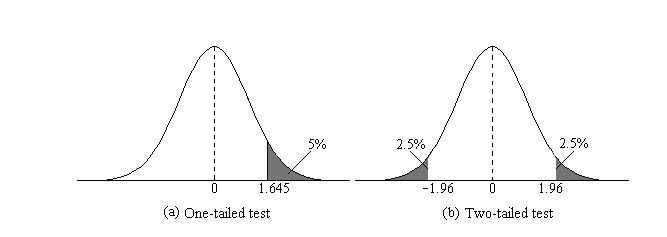

In [ ]:
data_filtered = data[data.Age.notna()]

In [ ]:
males_survived = data_filtered[(data_filtered['Survived']==1)&(data_filtered.Sex=='male')]
females_survived = data_filtered[(data_filtered['Survived']==1)&(data_filtered.Sex=='female')]

In [ ]:
males_survived.sample(10).Age.mean()

39.3

In [ ]:
n_sample = 100
sample_size = 60
male_sample_means = []
female_sample_means = []

for _ in range(n_sample):
  _m_mean = males_survived.sample(sample_size).Age.mean()
  male_sample_means.append(_m_mean)

  _f_mean = females_survived.sample(sample_size).Age.mean()
  female_sample_means.append(_f_mean)

<Axes: ylabel='Count'>

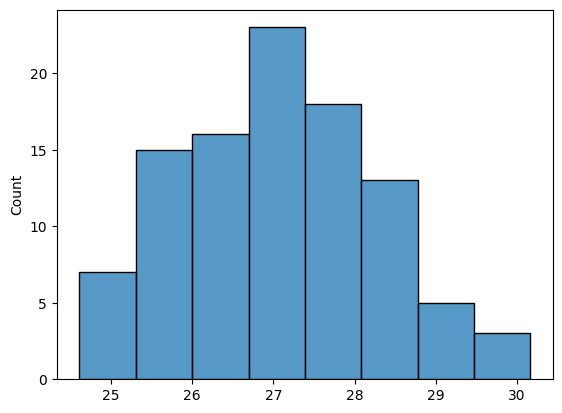

In [ ]:
sns.histplot(male_sample_means)

<Axes: ylabel='Count'>

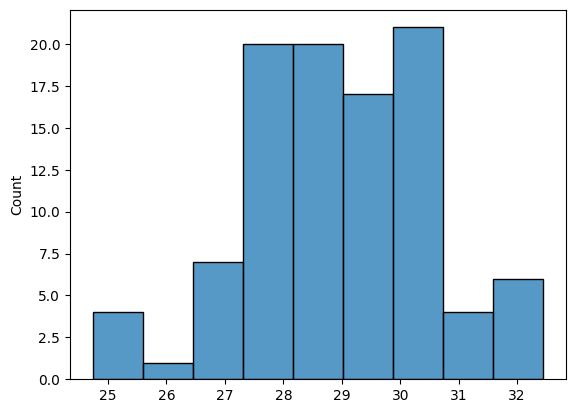

In [ ]:
sns.histplot(female_sample_means)

In [ ]:
z_score = (males_survived.Age.mean() - females_survived.Age.mean()) / np.sqrt(males_survived.Age.var() / len(males_survived) + females_survived.Age.var()/ len(females_survived))
z_score

-0.7908966227702466

In [ ]:
p_value = st.norm.sf(abs(z_score)) * 2

In [ ]:
p_value

0.429004319331695

In [ ]:
z_score_lib, p_val_lib = ztest(x1=males_survived.Age, x2=females_survived.Age, alternative='two-sided', usevar='unequal')

In [ ]:
z_score_lib, p_val_lib

(-0.7908966227702466, 0.429004319331695)

Greater than 50% of passengers who survived in Titanic are in the age group of 20-50

H_0: proportion_survived < 0.5

H_1: proportion_survived > 0.5

alpha = 0.05

In [ ]:
survived_all = data_filtered[data_filtered.Survived==1]
n_survived = len(survived_all)

In [ ]:
survived_all_in_age_20_50 = survived_all[(survived_all.Age >= 20) & (survived_all.Age <= 50)]
n_survived_all_in_age_20_50 = len(survived_all_in_age_20_50)

In [ ]:
n_survived_all_in_age_20_50

189

In [ ]:
proportion = n_survived_all_in_age_20_50 / n_survived

In [ ]:
proportion

0.6517241379310345

p-val = P(data | H_0 is True)

In [ ]:
n_survived

290

sqrt(p*(1-p)/n)

In [ ]:
se = np.sqrt(0.5*(1-0.5)/n_survived)
se

0.029361010975735173

In [ ]:
z_score = (proportion - 0.5) / np.sqrt(0.5 * (1-0.5)) / np.sqrt(290)

In [ ]:
z_score = (proportion - 0.5) / se

In [ ]:
z_score

5.16753793172939

In [ ]:
p_value = st.norm.sf(abs(z_score))

In [ ]:
p_value

1.1859891906705019e-07

In [ ]:
z_score_lib, p_value_lib = proportions_ztest(count=n_survived_all_in_age_20_50, nobs=n_survived, value=0.5, alternative='larger', prop_var=0.5)

In [ ]:
z_score_lib, p_value_lib

(5.16753793172939, 1.1859891906705019e-07)